<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/Copy_of_plr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('penguins.csv')

In [ ]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
data.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [ ]:
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:

data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
z=data['island'].values
print(z)

['Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen'
 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen'
 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen'
 'Torgersen' 'Torgersen' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe'
 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Dream' 'Dream' 'Dream'
 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream'
 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Biscoe'
 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe'
 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe' 'Biscoe'
 'Biscoe' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen'
 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen'
 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Torgersen' 'Dream'
 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream'
 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Biscoe' 'Bisc

In [ ]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(),inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(),inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(),inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(),inplace=True)

data['sex'].fillna(data['sex'].mode()[0],inplace=True)
data['sex']=data['sex'].replace('male',0)
data['sex']=data['sex'].replace('female',1)
data['species']=data['species'].replace('Adelie',0)
data['species']=data['species'].replace('Gentoo',1)
data['species']=data['species'].replace('Chinstrap',2)
data['island']=data['island'].replace('Torgersen',0)
data['island']=data['island'].replace('Biscoe',1)
data['island']=data['island'].replace('Dream',2)

In [ ]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [ ]:
X=data.drop('species',axis=1).values
y=data['species'].values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.reshape(-1,1)
y_train.reshape(-1,1)
reg=LogisticRegression(C=0.5)
reg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [ ]:
reg.coef_

array([[-3.48228023e-01,  9.72207667e-04, -2.52947255e-02,
         1.26404075e-02, -4.41253390e-02, -4.87111370e-03,
        -2.56260734e-03,  5.00891904e-02],
       [-1.87364636e-02, -8.36834201e-03, -1.21270491e-02,
        -2.59958243e-02,  6.96935927e-02,  8.83728214e-03,
        -2.16129089e-04, -1.56828094e-02],
       [ 3.66964487e-01,  7.39613435e-03,  3.74217746e-02,
         1.33554168e-02, -2.55682537e-02, -3.96616844e-03,
         2.77873643e-03, -3.44063811e-02]])

In [ ]:
reg.intercept_scaling

1

In [ ]:
reg.predict_proba(X_train)

array([[1.00000000e+00, 4.69025736e-19, 2.89941620e-64],
       [1.00000000e+00, 4.99599041e-23, 1.33459116e-62],
       [1.04813546e-15, 1.00000000e+00, 1.94566370e-10],
       [9.99998085e-01, 1.91514968e-06, 4.21799764e-25],
       [4.57584262e-14, 1.00000000e+00, 1.53704126e-17],
       [4.39885548e-20, 9.99999999e-01, 1.28440648e-09],
       [5.34096864e-21, 4.18291972e-05, 9.99958171e-01],
       [9.97444496e-01, 2.55550436e-03, 1.20079889e-26],
       [6.22213700e-22, 9.99993837e-01, 6.16287071e-06],
       [1.94552577e-13, 1.00000000e+00, 6.48083179e-26],
       [9.99994655e-01, 5.34467226e-06, 1.31657140e-25],
       [1.00000000e+00, 1.07064150e-20, 1.08897214e-63],
       [5.86149250e-19, 9.99999942e-01, 5.81114244e-08],
       [1.00000000e+00, 2.90779975e-13, 2.87776871e-45],
       [1.00000000e+00, 9.78283971e-15, 7.73256333e-37],
       [1.00000000e+00, 1.47788952e-26, 9.71263283e-65],
       [1.00000000e+00, 7.09514204e-15, 2.14942247e-34],
       [2.40738197e-18, 9.99787

In [ ]:
y_predict=reg.predict(X_test)
print(y_predict)

[1 1 1 1 2 2 2 1 0 1 2 0 0 0 2 0 0 1 2 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 2
 1 0 1 2 2 2 0 0 0 1 0 0 1 0 1 2 0 0 1 0 1 1 1 1 0 2 0 2 1 0 0 0 0 1 0 0 2
 2 2 0 0 0 1 0 2 1 0 1 1]


In [ ]:
reg.score(X_test, y_test)

1.0

In [ ]:
confusion_matrix(y_test,y_predict)

array([[40,  0,  0],
       [ 0, 29,  0],
       [ 0,  0, 17]])

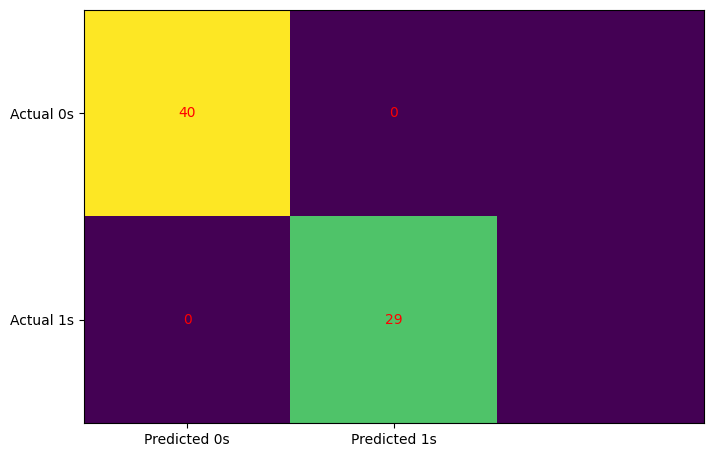

In [ ]:
cm=confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        17

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

